<a href="https://colab.research.google.com/github/JonathanRosasV/PythonBasico2/blob/main/EDA_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An√°lisis Exploratorio de Datos (EDA) - Dataset Titanic

Este notebook contiene un an√°lisis exploratorio completo del famoso dataset del Titanic.

## Objetivos:
- Explorar la estructura y caracter√≠sticas del dataset
- Identificar patrones y relaciones entre variables
- Analizar factores que influyeron en la supervivencia
- Preparar insights para modelado predictivo

## 1. Importaci√≥n de Librer√≠as

In [1]:
# Librer√≠as para manipulaci√≥n de datos
import pandas as pd
import numpy as np

# Librer√≠as para visualizaci√≥n
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraci√≥n de visualizaci√≥n
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Configuraci√≥n para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Carga y Exploraci√≥n Inicial del Dataset

In [2]:
# Cargar el dataset del Titanic
# Nota: Aseg√∫rate de tener el archivo 'titanic.csv' en tu directorio de trabajo
# Puedes descargarlo de: https://www.kaggle.com/c/titanic/data

try:
    df = pd.read_csv('titanic.csv')
    print("Dataset cargado exitosamente")
except FileNotFoundError:
    # Si no tienes el archivo, creamos un dataset de ejemplo
    print("Archivo no encontrado. Creando dataset de ejemplo...")
    # Aqu√≠ podr√≠as usar seaborn para cargar el dataset
    df = sns.load_dataset('titanic')
    print("Dataset de ejemplo cargado")

print(f"\nDimensiones del dataset: {df.shape}")
print(f"N√∫mero de filas: {df.shape[0]}")
print(f"N√∫mero de columnas: {df.shape[1]}")

Archivo no encontrado. Creando dataset de ejemplo...
Dataset de ejemplo cargado

Dimensiones del dataset: (891, 15)
N√∫mero de filas: 891
N√∫mero de columnas: 15


In [3]:
# Primeras 5 filas del dataset
print("Primeras 5 filas del dataset:")
df.head()

Primeras 5 filas del dataset:


survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [4]:
# Informaci√≥n general del dataset
print("Informaci√≥n general del dataset:")
df.info()

Informaci√≥n general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
# Descripci√≥n estad√≠stica de variables num√©ricas
print("Estad√≠sticas descriptivas de variables num√©ricas:")
df.describe()

Estad√≠sticas descriptivas de variables num√©ricas:


survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

### Diccionario de Datos

- **Survived:**  
  0 = Fallecido, 1 = Sobreviviente

- **Pclass:**  
  Clase del pasajero (1 = Primera clase, 2 = Segunda clase, 3 = Tercera clase)

- **Name:**  
  Nombre del pasajero

- **Sex:**  
  Sexo del pasajero

- **Sibsp:**  
  N√∫mero de hermanos/esposos a bordo

- **Parch:**  
  N√∫mero de padres/hijos a bordo

- **Ticket:**  
  N√∫mero de boleto

- **Fare:**  
  Precio del boleto

- **Cabin:**  
  N√∫mero de cabina

- **Embarked:**  
  Puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)

## 3. An√°lisis de Valores Faltantes

In [6]:
# An√°lisis de valores faltantes
print("Valores faltantes por columna:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Columna': missing_data.index,
    'Valores_Faltantes': missing_data.values,
    'Porcentaje': missing_percent.values
})

missing_df = missing_df[missing_df['Valores_Faltantes'] > 0].sort_values('Valores_Faltantes', ascending=False)
print(missing_df)

Valores faltantes por columna:
        Columna  Valores_Faltantes  Porcentaje
11         deck                688   77.216611
3           age                177   19.865320
7      embarked                  2    0.224467
12  embark_town                  2    0.224467


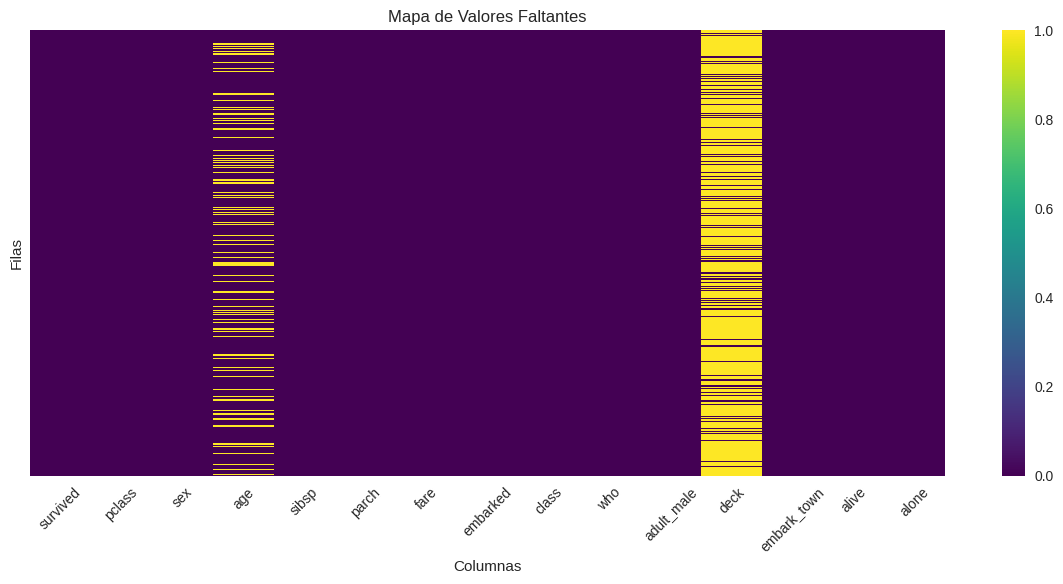

In [7]:
# Visualizaci√≥n de valores faltantes
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Mapa de Valores Faltantes')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. An√°lisis de la Variable Objetivo: Supervivencia

Distribuci√≥n de Supervivencia:
No sobrevivieron: 549 (61.6%)
Sobrevivieron: 342 (38.4%)


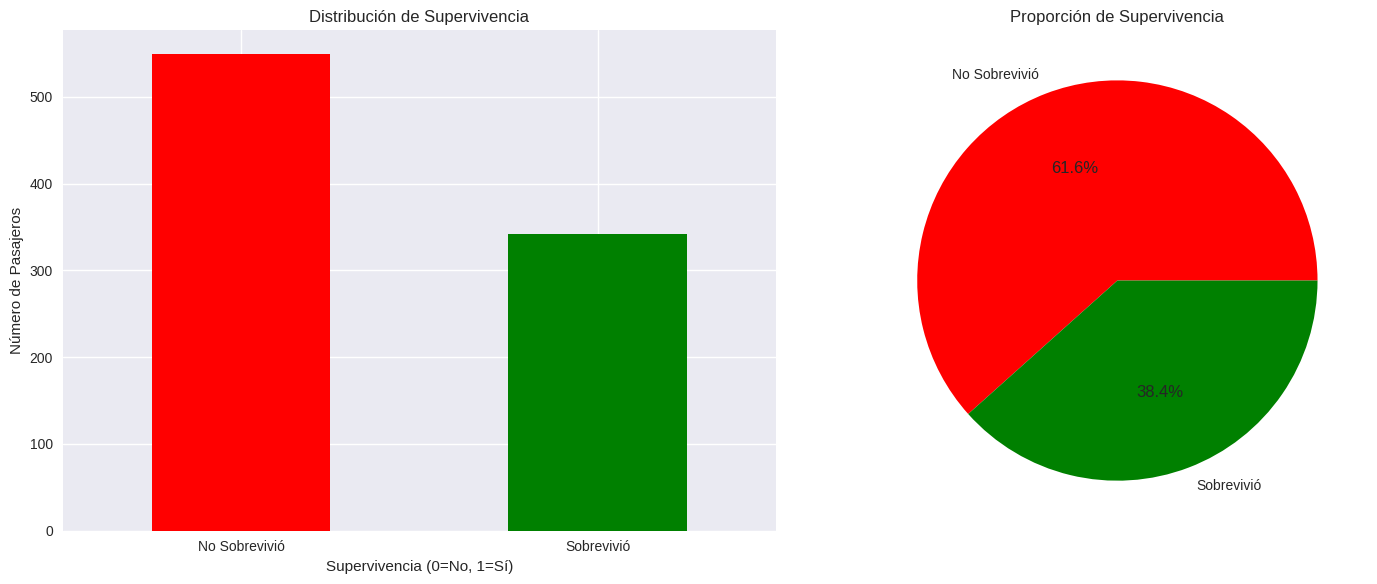

In [8]:
# An√°lisis de supervivencia
survival_counts = df['survived'].value_counts()
survival_percent = df['survived'].value_counts(normalize=True) * 100

print("Distribuci√≥n de Supervivencia:")
print(f"No sobrevivieron: {survival_counts[0]} ({survival_percent[0]:.1f}%)")
print(f"Sobrevivieron: {survival_counts[1]} ({survival_percent[1]:.1f}%)")

# Visualizaci√≥n
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gr√°fico de barras
survival_counts.plot(kind='bar', ax=ax1, color=['red', 'green'])
ax1.set_title('Distribuci√≥n de Supervivencia')
ax1.set_xlabel('Supervivencia (0=No, 1=S√≠)')
ax1.set_ylabel('N√∫mero de Pasajeros')
ax1.set_xticklabels(['No Sobrevivi√≥', 'Sobrevivi√≥'], rotation=0)

# Gr√°fico de pastel
ax2.pie(survival_counts.values, labels=['No Sobrevivi√≥', 'Sobrevivi√≥'],
        autopct='%1.1f%%', colors=['red', 'green'])
ax2.set_title('Proporci√≥n de Supervivencia')

plt.tight_layout()
plt.show()

## 5. An√°lisis por G√©nero

Tabla de contingencia - G√©nero vs Supervivencia:
survived    0    1  All
sex                    
female     81  233  314
male      468  109  577
All       549  342  891

Porcentajes por g√©nero:
survived          0          1
sex                           
female    25.796178  74.203822
male      81.109185  18.890815


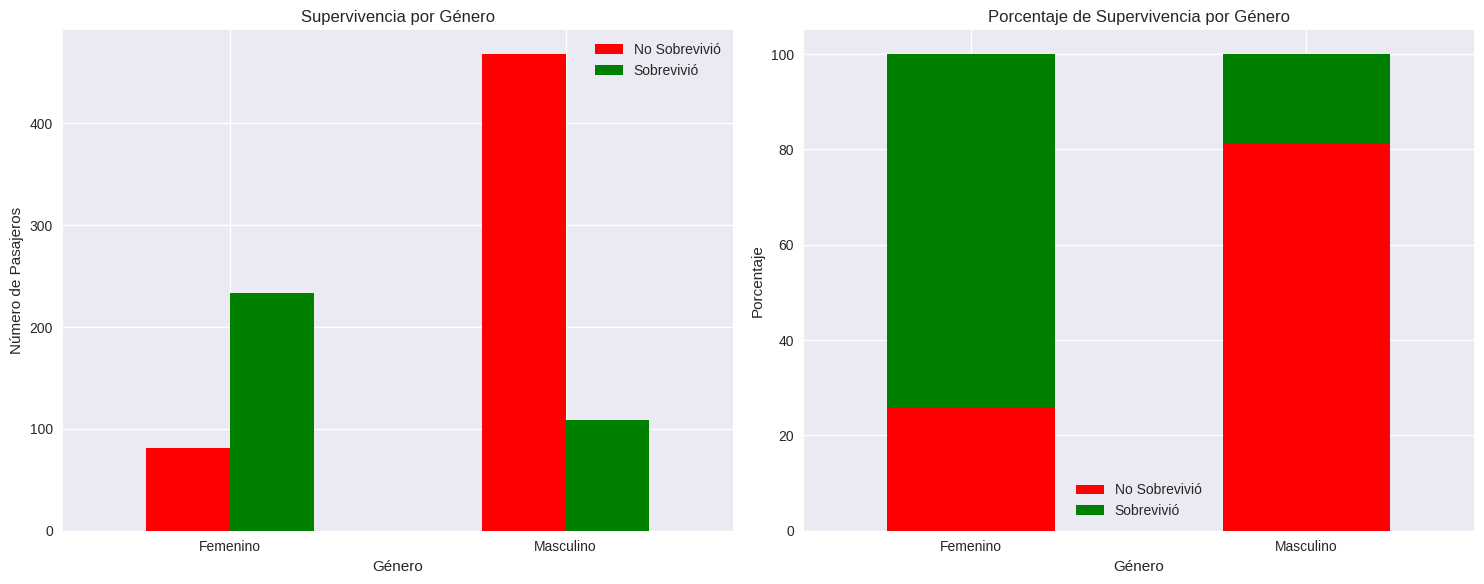

In [9]:
# An√°lisis de supervivencia por g√©nero
gender_survival = pd.crosstab(df['sex'], df['survived'], margins=True)
gender_survival_pct = pd.crosstab(df['sex'], df['survived'], normalize='index') * 100

print("Tabla de contingencia - G√©nero vs Supervivencia:")
print(gender_survival)
print("\nPorcentajes por g√©nero:")
print(gender_survival_pct)

# Visualizaci√≥n
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gr√°fico de barras agrupadas
gender_survival.iloc[:-1, :-1].plot(kind='bar', ax=ax1, color=['red', 'green'])
ax1.set_title('Supervivencia por G√©nero')
ax1.set_xlabel('G√©nero')
ax1.set_ylabel('N√∫mero de Pasajeros')
ax1.legend(['No Sobrevivi√≥', 'Sobrevivi√≥'])
ax1.set_xticklabels(['Femenino', 'Masculino'], rotation=0)

# Gr√°fico de barras apiladas (porcentajes)
gender_survival_pct.plot(kind='bar', stacked=True, ax=ax2, color=['red', 'green'])
ax2.set_title('Porcentaje de Supervivencia por G√©nero')
ax2.set_xlabel('G√©nero')
ax2.set_ylabel('Porcentaje')
ax2.legend(['No Sobrevivi√≥', 'Sobrevivi√≥'])
ax2.set_xticklabels(['Femenino', 'Masculino'], rotation=0)

plt.tight_layout()
plt.show()

## 6. An√°lisis por Clase de Pasajero

Tabla de contingencia - Clase vs Supervivencia:
survived    0    1  All
pclass                 
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891

Porcentajes por clase:
survived          0          1
pclass                        
1         37.037037  62.962963
2         52.717391  47.282609
3         75.763747  24.236253


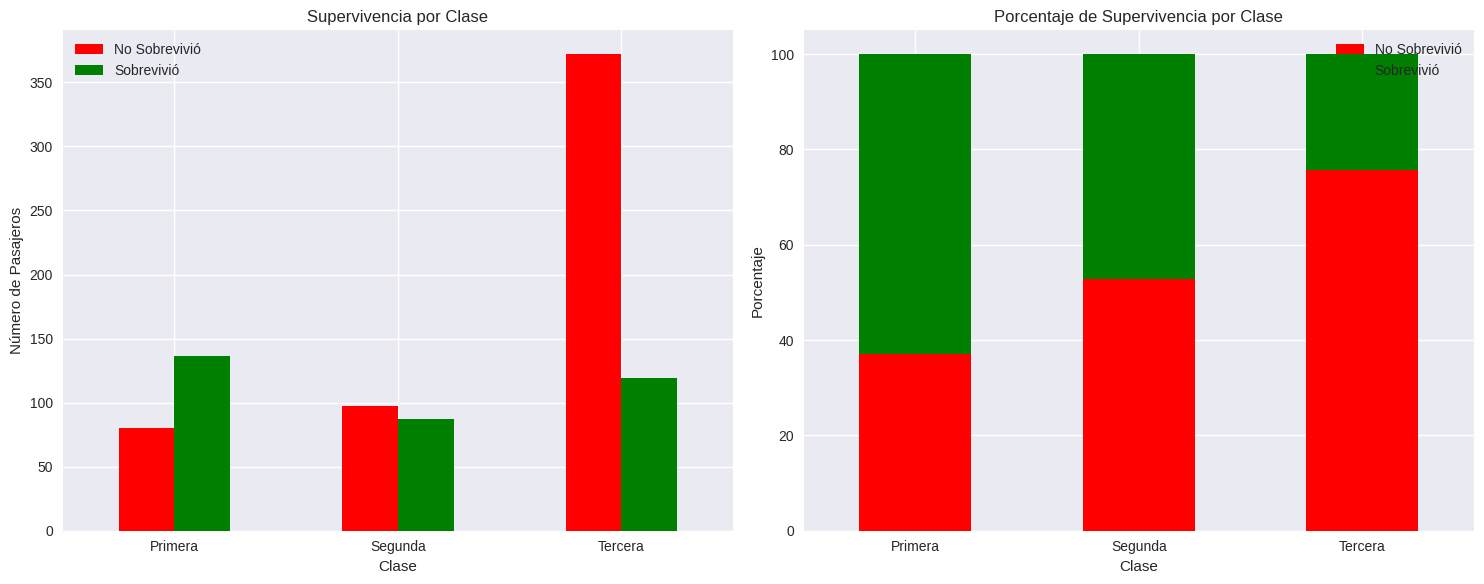

In [10]:
# An√°lisis de supervivencia por clase
class_survival = pd.crosstab(df['pclass'], df['survived'], margins=True)
class_survival_pct = pd.crosstab(df['pclass'], df['survived'], normalize='index') * 100

print("Tabla de contingencia - Clase vs Supervivencia:")
print(class_survival)
print("\nPorcentajes por clase:")
print(class_survival_pct)

# Visualizaci√≥n
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gr√°fico de barras agrupadas
class_survival.iloc[:-1, :-1].plot(kind='bar', ax=ax1, color=['red', 'green'])
ax1.set_title('Supervivencia por Clase')
ax1.set_xlabel('Clase')
ax1.set_ylabel('N√∫mero de Pasajeros')
ax1.legend(['No Sobrevivi√≥', 'Sobrevivi√≥'])
ax1.set_xticklabels(['Primera', 'Segunda', 'Tercera'], rotation=0)

# Gr√°fico de barras apiladas (porcentajes)
class_survival_pct.plot(kind='bar', stacked=True, ax=ax2, color=['red', 'green'])
ax2.set_title('Porcentaje de Supervivencia por Clase')
ax2.set_xlabel('Clase')
ax2.set_ylabel('Porcentaje')
ax2.legend(['No Sobrevivi√≥', 'Sobrevivi√≥'])
ax2.set_xticklabels(['Primera', 'Segunda', 'Tercera'], rotation=0)

plt.tight_layout()
plt.show()

## 7. An√°lisis de Edad

Estad√≠sticas de edad:
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


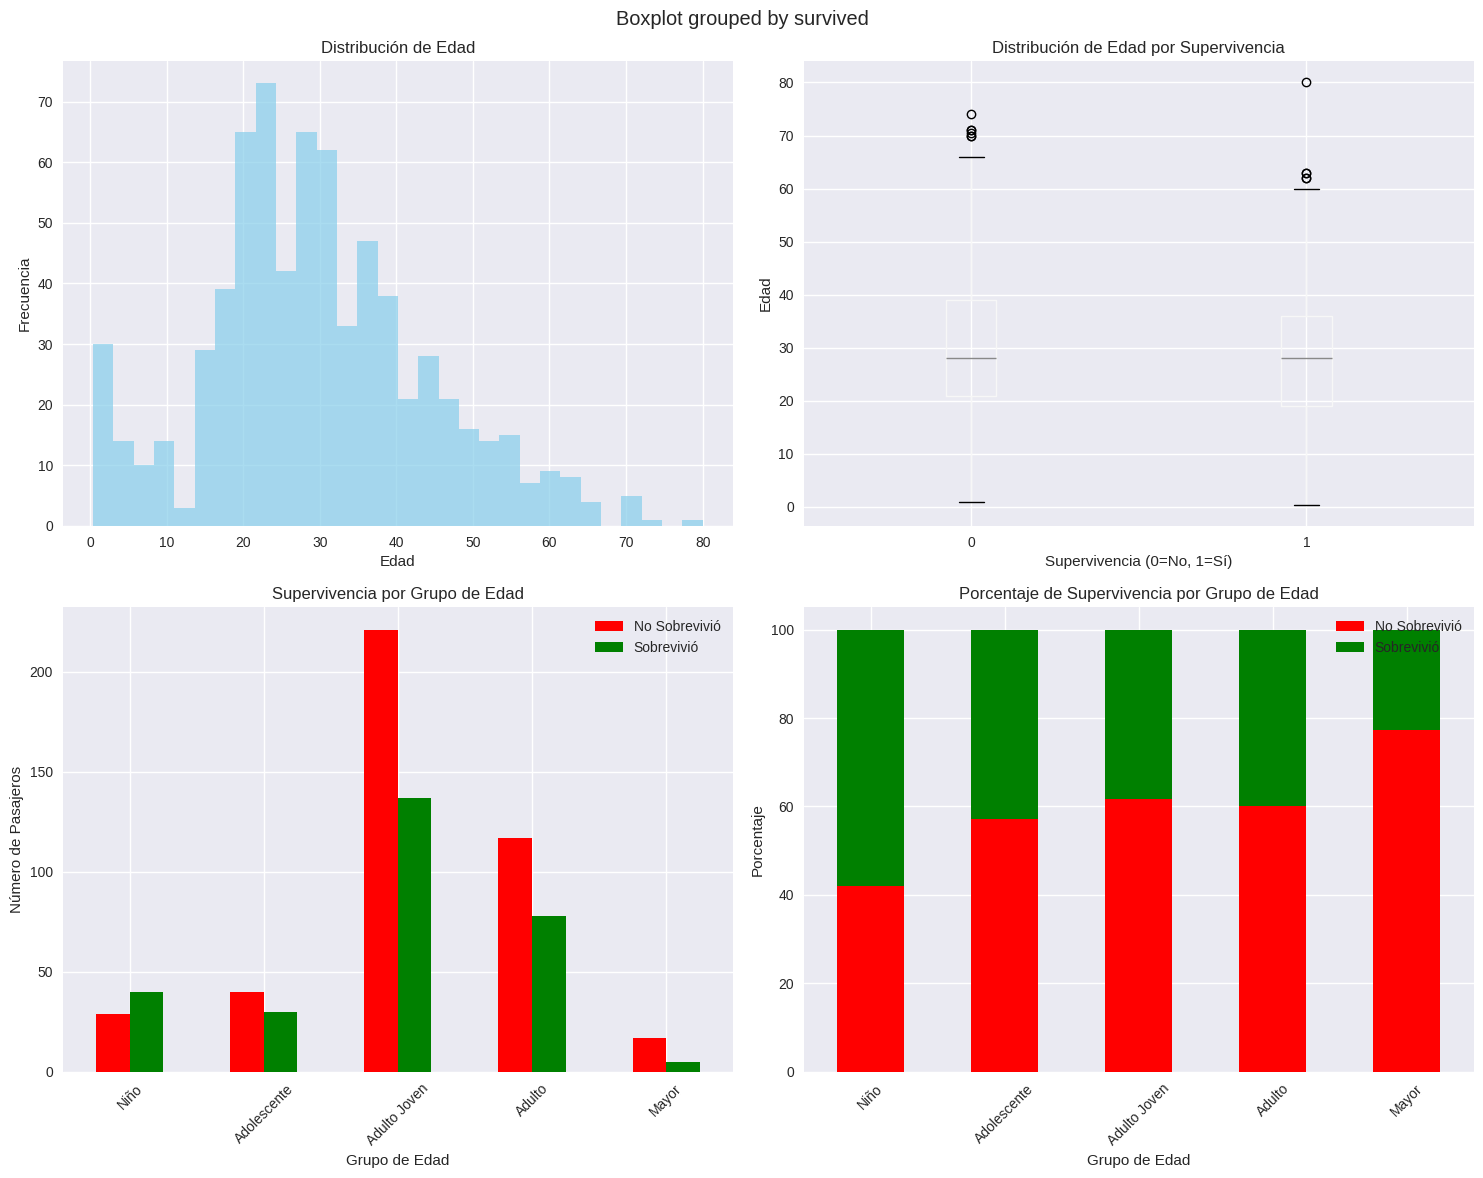

In [11]:
# An√°lisis de edad
print("Estad√≠sticas de edad:")
print(df['age'].describe())

# Crear grupos de edad
df['age_group'] = pd.cut(df['age'],
                        bins=[0, 12, 18, 35, 60, 100],
                        labels=['Ni√±o', 'Adolescente', 'Adulto Joven', 'Adulto', 'Mayor'])

# Visualizaci√≥n de distribuci√≥n de edad
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Histograma de edad
df['age'].hist(bins=30, ax=ax1, alpha=0.7, color='skyblue')
ax1.set_title('Distribuci√≥n de Edad')
ax1.set_xlabel('Edad')
ax1.set_ylabel('Frecuencia')

# Box plot de edad por supervivencia
df.boxplot(column='age', by='survived', ax=ax2)
ax2.set_title('Distribuci√≥n de Edad por Supervivencia')
ax2.set_xlabel('Supervivencia (0=No, 1=S√≠)')
ax2.set_ylabel('Edad')

# Supervivencia por grupo de edad
age_survival = pd.crosstab(df['age_group'], df['survived'])
age_survival.plot(kind='bar', ax=ax3, color=['red', 'green'])
ax3.set_title('Supervivencia por Grupo de Edad')
ax3.set_xlabel('Grupo de Edad')
ax3.set_ylabel('N√∫mero de Pasajeros')
ax3.legend(['No Sobrevivi√≥', 'Sobrevivi√≥'])
ax3.tick_params(axis='x', rotation=45)

# Porcentaje de supervivencia por grupo de edad
age_survival_pct = pd.crosstab(df['age_group'], df['survived'], normalize='index') * 100
age_survival_pct.plot(kind='bar', stacked=True, ax=ax4, color=['red', 'green'])
ax4.set_title('Porcentaje de Supervivencia por Grupo de Edad')
ax4.set_xlabel('Grupo de Edad')
ax4.set_ylabel('Porcentaje')
ax4.legend(['No Sobrevivi√≥', 'Sobrevivi√≥'])
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 8. An√°lisis de Familiares a Bordo

Distribuci√≥n del tama√±o de familia:
family_size
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64


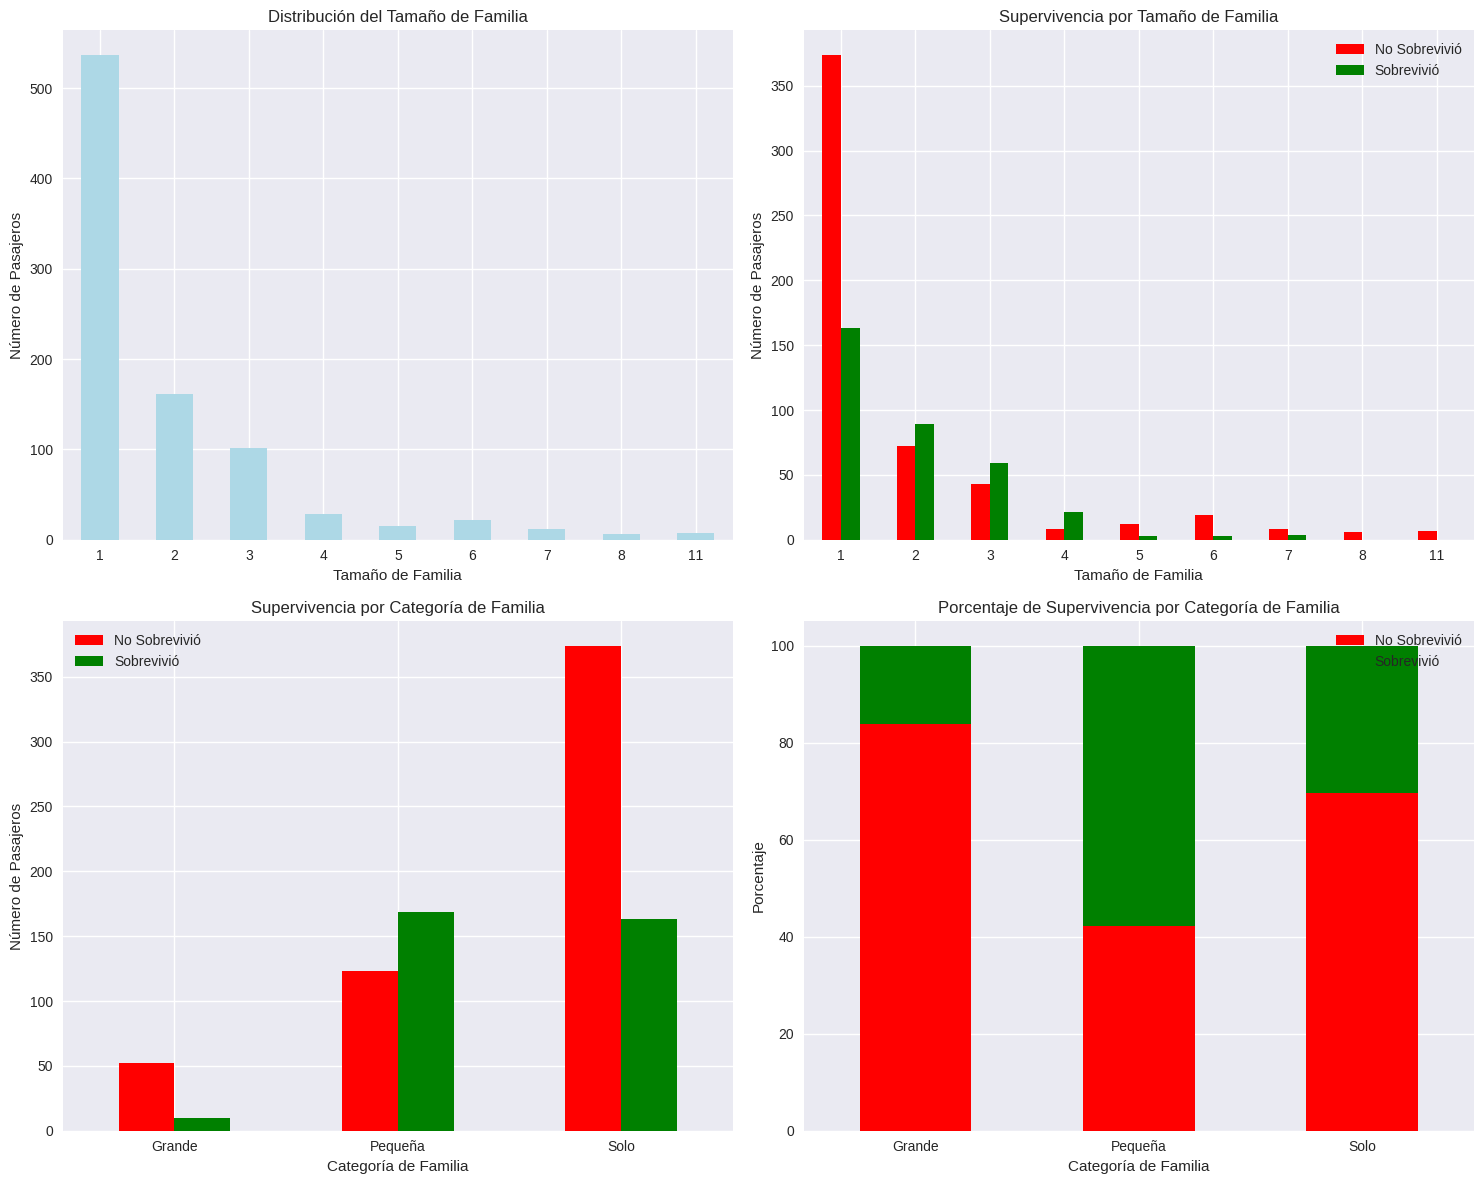

In [12]:
# Crear variable de tama√±o de familia
df['family_size'] = df['sibsp'] + df['parch'] + 1  # +1 para incluir al pasajero mismo

# Categorizar tama√±o de familia
df['family_category'] = df['family_size'].apply(lambda x: 'Solo' if x == 1
                                                else 'Peque√±a' if x <= 4
                                                else 'Grande')

print("Distribuci√≥n del tama√±o de familia:")
print(df['family_size'].value_counts().sort_index())

# Visualizaci√≥n
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Distribuci√≥n de tama√±o de familia
df['family_size'].value_counts().sort_index().plot(kind='bar', ax=ax1, color='lightblue')
ax1.set_title('Distribuci√≥n del Tama√±o de Familia')
ax1.set_xlabel('Tama√±o de Familia')
ax1.set_ylabel('N√∫mero de Pasajeros')
ax1.tick_params(axis='x', rotation=0)

# Supervivencia por tama√±o de familia
family_survival = pd.crosstab(df['family_size'], df['survived'])
family_survival.plot(kind='bar', ax=ax2, color=['red', 'green'])
ax2.set_title('Supervivencia por Tama√±o de Familia')
ax2.set_xlabel('Tama√±o de Familia')
ax2.set_ylabel('N√∫mero de Pasajeros')
ax2.legend(['No Sobrevivi√≥', 'Sobrevivi√≥'])
ax2.tick_params(axis='x', rotation=0)

# Supervivencia por categor√≠a de familia
family_cat_survival = pd.crosstab(df['family_category'], df['survived'])
family_cat_survival.plot(kind='bar', ax=ax3, color=['red', 'green'])
ax3.set_title('Supervivencia por Categor√≠a de Familia')
ax3.set_xlabel('Categor√≠a de Familia')
ax3.set_ylabel('N√∫mero de Pasajeros')
ax3.legend(['No Sobrevivi√≥', 'Sobrevivi√≥'])
ax3.tick_params(axis='x', rotation=0)

# Porcentaje de supervivencia por categor√≠a de familia
family_cat_survival_pct = pd.crosstab(df['family_category'], df['survived'], normalize='index') * 100
family_cat_survival_pct.plot(kind='bar', stacked=True, ax=ax4, color=['red', 'green'])
ax4.set_title('Porcentaje de Supervivencia por Categor√≠a de Familia')
ax4.set_xlabel('Categor√≠a de Familia')
ax4.set_ylabel('Porcentaje')
ax4.legend(['No Sobrevivi√≥', 'Sobrevivi√≥'])
ax4.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

## 9. An√°lisis de Tarifas

Estad√≠sticas de tarifas:
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64


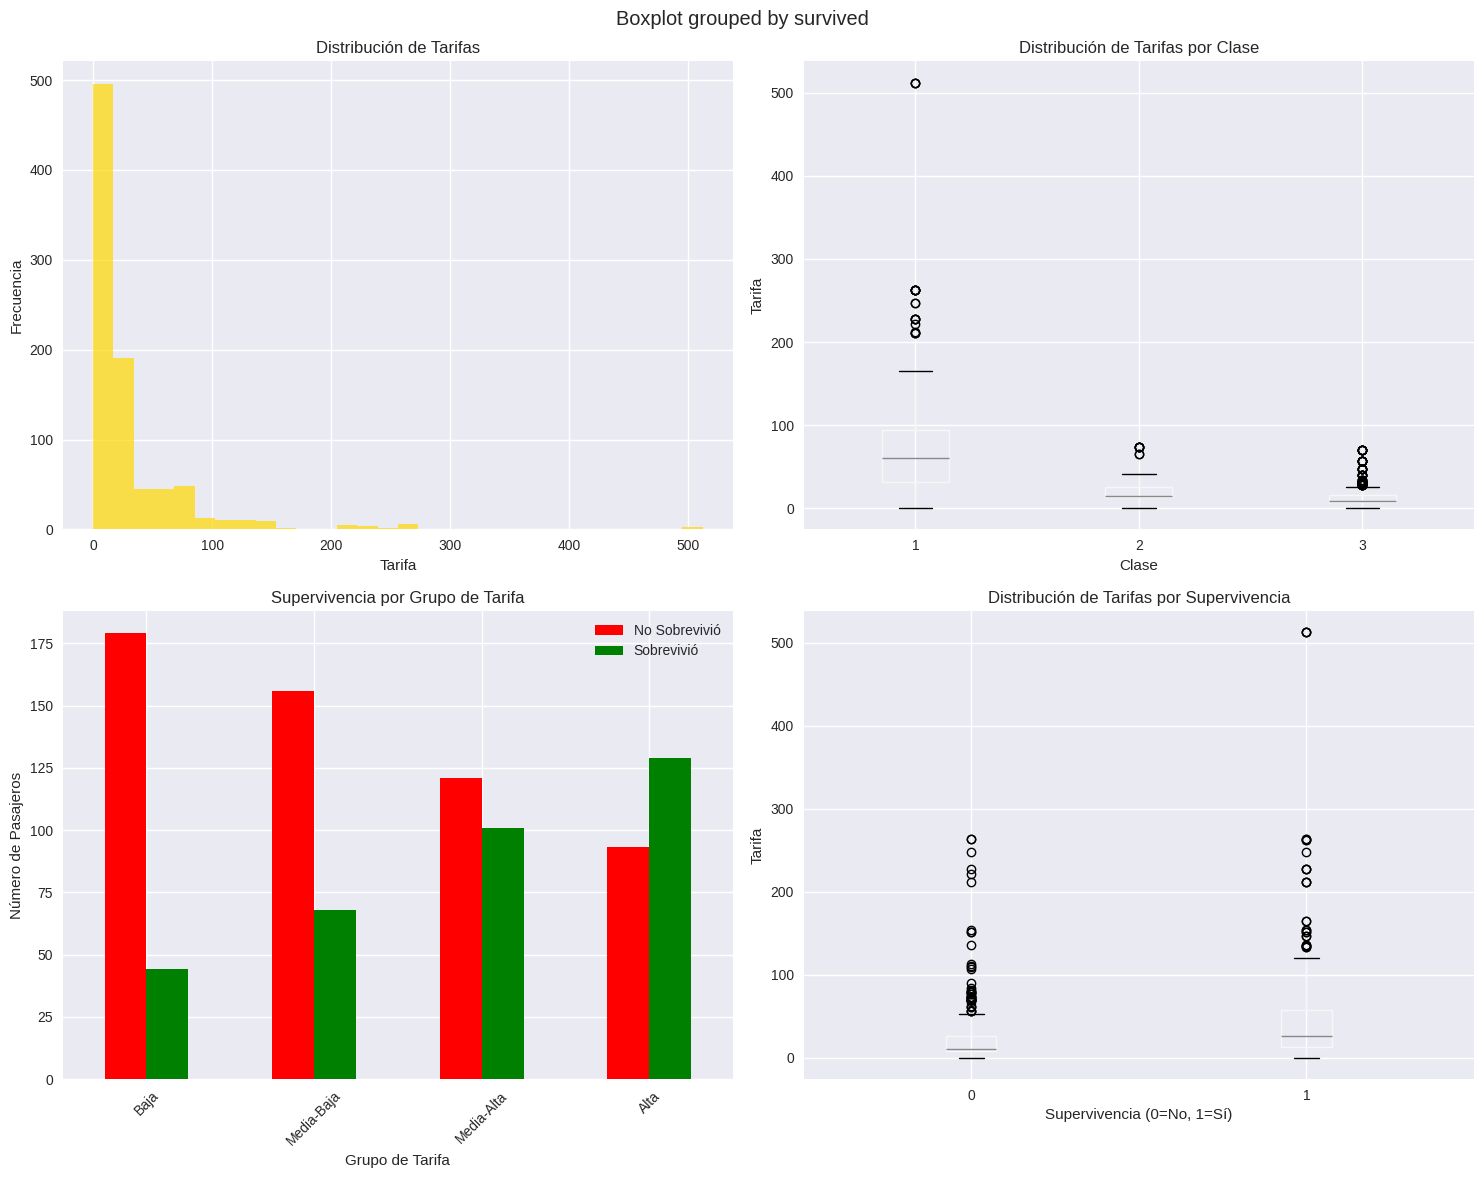

In [13]:
# An√°lisis de tarifas
print("Estad√≠sticas de tarifas:")
print(df['fare'].describe())

# Crear grupos de tarifas
df['fare_group'] = pd.qcut(df['fare'], q=4, labels=['Baja', 'Media-Baja', 'Media-Alta', 'Alta'])

# Visualizaci√≥n
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Histograma de tarifas
df['fare'].hist(bins=30, ax=ax1, alpha=0.7, color='gold')
ax1.set_title('Distribuci√≥n de Tarifas')
ax1.set_xlabel('Tarifa')
ax1.set_ylabel('Frecuencia')

# Box plot de tarifas por clase
df.boxplot(column='fare', by='pclass', ax=ax2)
ax2.set_title('Distribuci√≥n de Tarifas por Clase')
ax2.set_xlabel('Clase')
ax2.set_ylabel('Tarifa')

# Supervivencia por grupo de tarifa
fare_survival = pd.crosstab(df['fare_group'], df['survived'])
fare_survival.plot(kind='bar', ax=ax3, color=['red', 'green'])
ax3.set_title('Supervivencia por Grupo de Tarifa')
ax3.set_xlabel('Grupo de Tarifa')
ax3.set_ylabel('N√∫mero de Pasajeros')
ax3.legend(['No Sobrevivi√≥', 'Sobrevivi√≥'])
ax3.tick_params(axis='x', rotation=45)

# Box plot de tarifas por supervivencia
df.boxplot(column='fare', by='survived', ax=ax4)
ax4.set_title('Distribuci√≥n de Tarifas por Supervivencia')
ax4.set_xlabel('Supervivencia (0=No, 1=S√≠)')
ax4.set_ylabel('Tarifa')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Tarifa pagada por pasajeros de 3ra clase')

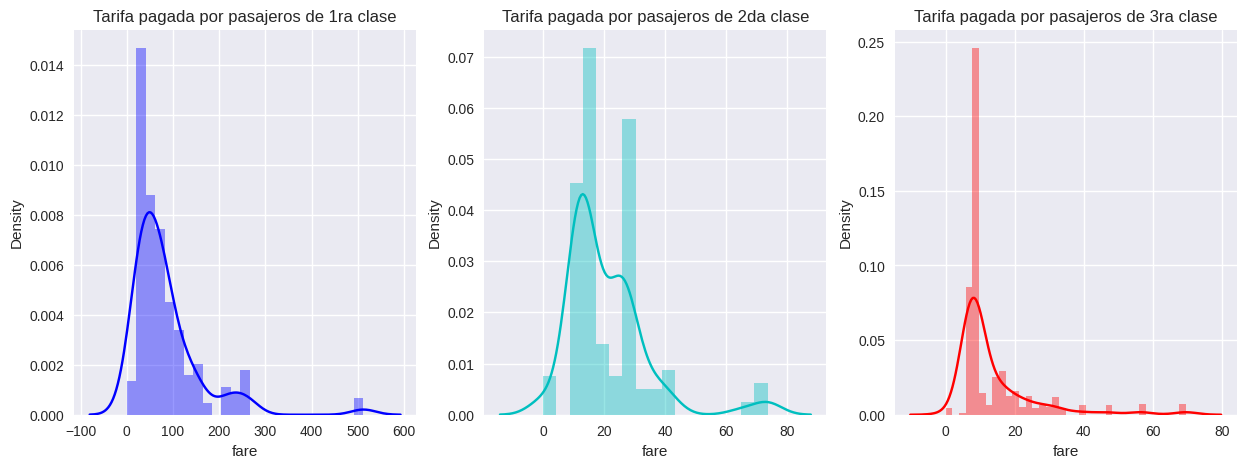

In [20]:
# Los pasajeros de clases m√°s altas pagaron tarifas m√°s elevadas.
# Es decir, a menor n√∫mero de clase (Pclass), mayor ser√° el valor de la tarifa (Fare).

_, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.distplot(df[df['pclass'] == 1]['fare'], ax=ax[0], color='b')
ax[0].set_title('Tarifa pagada por pasajeros de 1ra clase')

sns.distplot(df[df['pclass'] == 2]['fare'], ax=ax[1], color='c')
ax[1].set_title('Tarifa pagada por pasajeros de 2da clase')

sns.distplot(df[df['pclass'] == 3]['fare'], ax=ax[2], color='r')
ax[2].set_title('Tarifa pagada por pasajeros de 3ra clase')

# Se puede observar que los pasajeros de 1ra clase pagaron las tarifas m√°s altas, seguidos por los de 2da y 3ra clase.

## 10. An√°lisis de Puerto de Embarque

Distribuci√≥n por puerto de embarque:
embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64


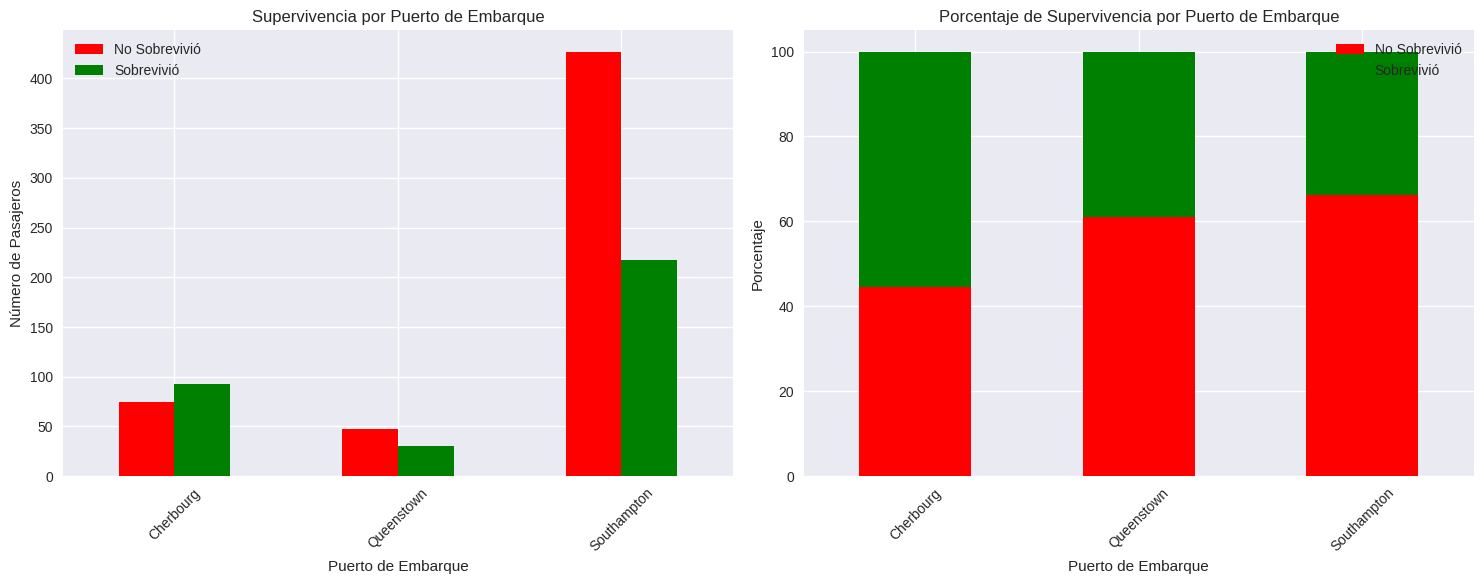

In [14]:
# An√°lisis de puerto de embarque
print("Distribuci√≥n por puerto de embarque:")
print(df['embark_town'].value_counts())

# Visualizaci√≥n
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Supervivencia por puerto de embarque
embark_survival = pd.crosstab(df['embark_town'], df['survived'])
embark_survival.plot(kind='bar', ax=ax1, color=['red', 'green'])
ax1.set_title('Supervivencia por Puerto de Embarque')
ax1.set_xlabel('Puerto de Embarque')
ax1.set_ylabel('N√∫mero de Pasajeros')
ax1.legend(['No Sobrevivi√≥', 'Sobrevivi√≥'])
ax1.tick_params(axis='x', rotation=45)

# Porcentaje de supervivencia por puerto de embarque
embark_survival_pct = pd.crosstab(df['embark_town'], df['survived'], normalize='index') * 100
embark_survival_pct.plot(kind='bar', stacked=True, ax=ax2, color=['red', 'green'])
ax2.set_title('Porcentaje de Supervivencia por Puerto de Embarque')
ax2.set_xlabel('Puerto de Embarque')
ax2.set_ylabel('Porcentaje')
ax2.legend(['No Sobrevivi√≥', 'Sobrevivi√≥'])
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 11. An√°lisis Multivariado

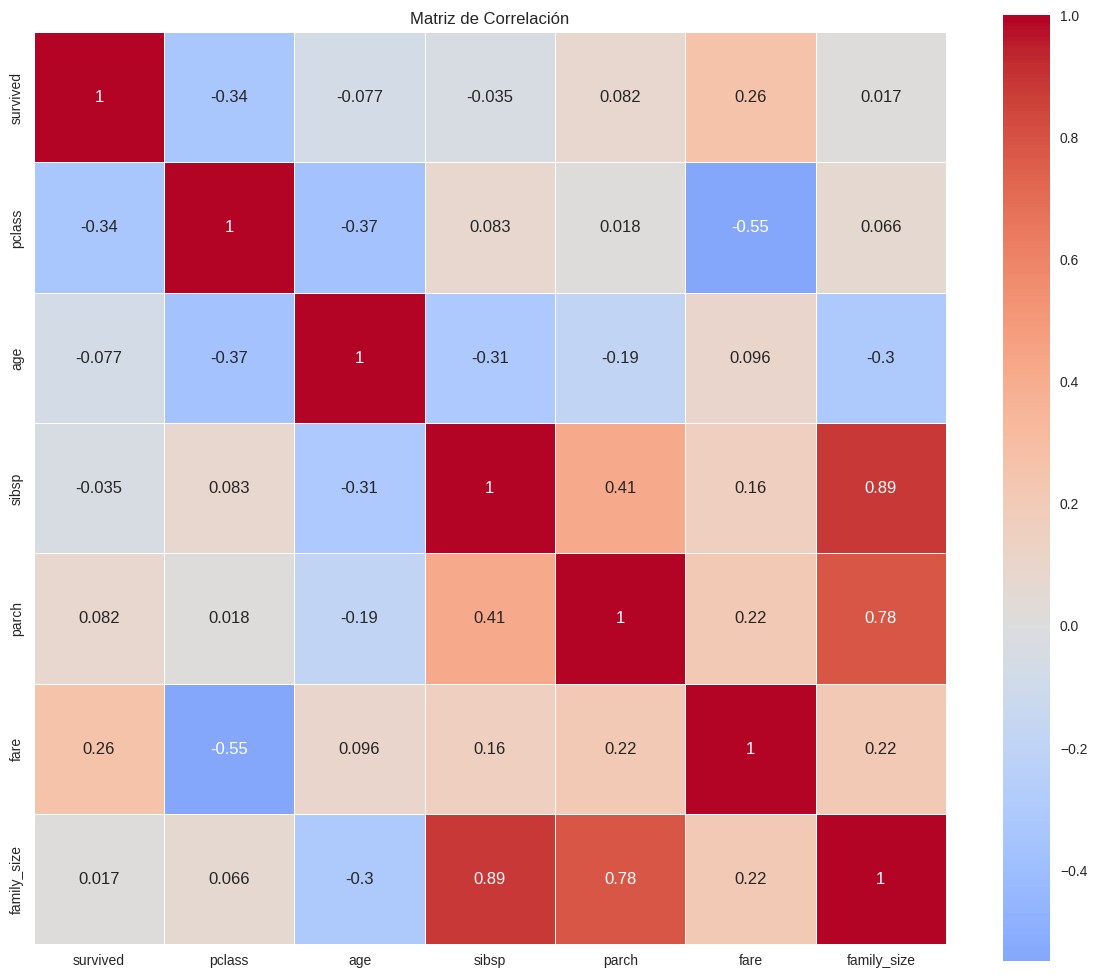

In [15]:
# Matriz de correlaci√≥n
# Seleccionar solo variables num√©ricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# Visualizaci√≥n de la matriz de correlaci√≥n
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Matriz de Correlaci√≥n')
plt.tight_layout()
plt.show()

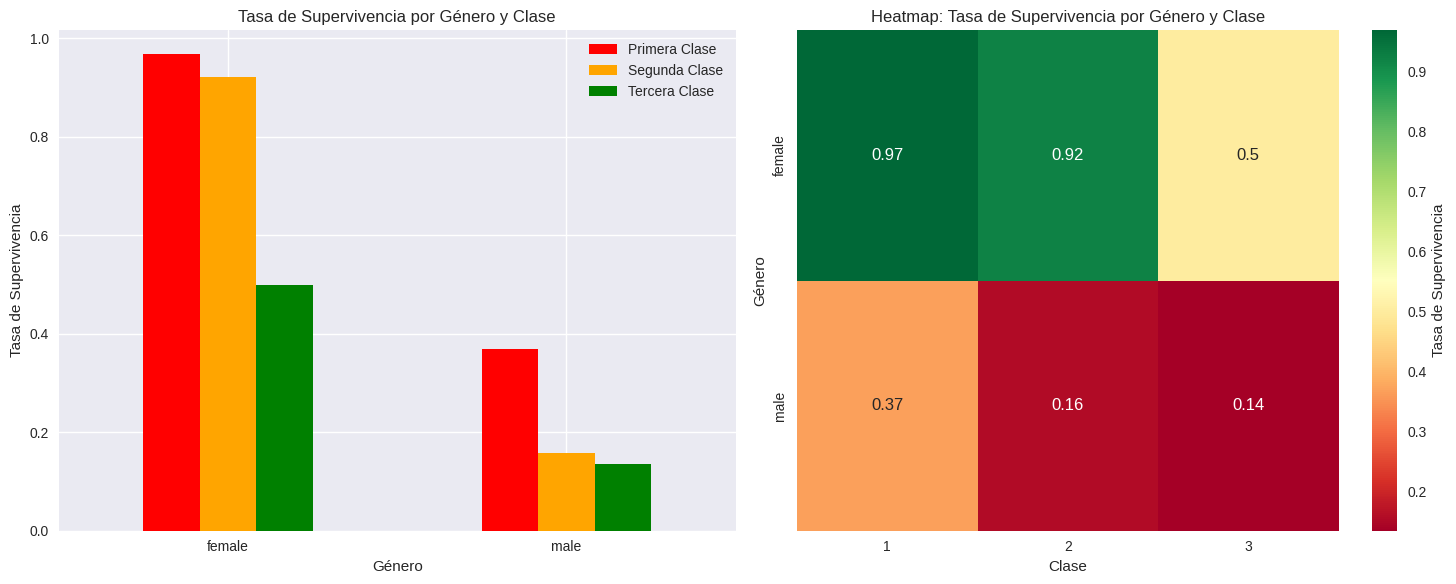

In [16]:
# An√°lisis combinado: G√©nero, Clase y Supervivencia
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Supervivencia por g√©nero y clase
survival_by_sex_class = df.groupby(['sex', 'pclass'])['survived'].mean()
survival_by_sex_class.unstack().plot(kind='bar', ax=ax1, color=['red', 'orange', 'green'])
ax1.set_title('Tasa de Supervivencia por G√©nero y Clase')
ax1.set_xlabel('G√©nero')
ax1.set_ylabel('Tasa de Supervivencia')
ax1.legend(['Primera Clase', 'Segunda Clase', 'Tercera Clase'])
ax1.tick_params(axis='x', rotation=0)

# Heatmap de supervivencia por g√©nero y clase
pivot_table = df.pivot_table(values='survived', index='sex', columns='pclass', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='RdYlGn', ax=ax2, cbar_kws={'label': 'Tasa de Supervivencia'})
ax2.set_title('Heatmap: Tasa de Supervivencia por G√©nero y Clase')
ax2.set_xlabel('Clase')
ax2.set_ylabel('G√©nero')

plt.tight_layout()
plt.show()

## 12. Resumen de Insights Principales

In [17]:
# Calcular estad√≠sticas clave para el resumen
total_passengers = len(df)
survival_rate = df['survived'].mean() * 100
female_survival_rate = df[df['sex'] == 'female']['survived'].mean() * 100
male_survival_rate = df[df['sex'] == 'male']['survived'].mean() * 100
first_class_survival = df[df['pclass'] == 1]['survived'].mean() * 100
third_class_survival = df[df['pclass'] == 3]['survived'].mean() * 100

print("=" * 60)
print("RESUMEN DE INSIGHTS PRINCIPALES - AN√ÅLISIS EDA TITANIC")
print("=" * 60)
print(f"\nüìä ESTAD√çSTICAS GENERALES:")
print(f"   ‚Ä¢ Total de pasajeros: {total_passengers}")
print(f"   ‚Ä¢ Tasa general de supervivencia: {survival_rate:.1f}%")

print(f"\nüë• AN√ÅLISIS POR G√âNERO:")
print(f"   ‚Ä¢ Supervivencia mujeres: {female_survival_rate:.1f}%")
print(f"   ‚Ä¢ Supervivencia hombres: {male_survival_rate:.1f}%")
print(f"   ‚Ä¢ Las mujeres tuvieron {female_survival_rate/male_survival_rate:.1f}x m√°s probabilidad de sobrevivir")

print(f"\nüé´ AN√ÅLISIS POR CLASE:")
print(f"   ‚Ä¢ Supervivencia Primera Clase: {first_class_survival:.1f}%")
print(f"   ‚Ä¢ Supervivencia Tercera Clase: {third_class_survival:.1f}%")
print(f"   ‚Ä¢ Diferencia entre clases: {first_class_survival - third_class_survival:.1f} puntos porcentuales")

print(f"\nüë∂ AN√ÅLISIS POR EDAD:")
children_survival = df[df['age'] <= 12]['survived'].mean() * 100
adults_survival = df[df['age'] > 12]['survived'].mean() * 100
print(f"   ‚Ä¢ Supervivencia ni√±os (‚â§12 a√±os): {children_survival:.1f}%")
print(f"   ‚Ä¢ Supervivencia adultos (>12 a√±os): {adults_survival:.1f}%")

print(f"\nüë®‚Äçüë©‚Äçüëß‚Äçüë¶ AN√ÅLISIS FAMILIAR:")
solo_survival = df[df['family_size'] == 1]['survived'].mean() * 100
small_family_survival = df[(df['family_size'] > 1) & (df['family_size'] <= 4)]['survived'].mean() * 100
print(f"   ‚Ä¢ Supervivencia viajeros solos: {solo_survival:.1f}%")
print(f"   ‚Ä¢ Supervivencia familias peque√±as (2-4): {small_family_survival:.1f}%")

print(f"\nüîë FACTORES CLAVE DE SUPERVIVENCIA:")
print(f"   1. G√©nero: Ser mujer aument√≥ significativamente las probabilidades")
print(f"   2. Clase social: Primera clase tuvo mayor tasa de supervivencia")
print(f"   3. Edad: Los ni√±os tuvieron ventaja en la supervivencia")
print(f"   4. Familia: Viajar con familia peque√±a fue beneficioso")
print(f"   5. Tarifa: Tarifas m√°s altas correlacionaron con mayor supervivencia")

print("\n" + "=" * 60)

RESUMEN DE INSIGHTS PRINCIPALES - AN√ÅLISIS EDA TITANIC

üìä ESTAD√çSTICAS GENERALES:
   ‚Ä¢ Total de pasajeros: 891
   ‚Ä¢ Tasa general de supervivencia: 38.4%

üë• AN√ÅLISIS POR G√âNERO:
   ‚Ä¢ Supervivencia mujeres: 74.2%
   ‚Ä¢ Supervivencia hombres: 18.9%
   ‚Ä¢ Las mujeres tuvieron 3.9x m√°s probabilidad de sobrevivir

üé´ AN√ÅLISIS POR CLASE:
   ‚Ä¢ Supervivencia Primera Clase: 63.0%
   ‚Ä¢ Supervivencia Tercera Clase: 24.2%
   ‚Ä¢ Diferencia entre clases: 38.7 puntos porcentuales

üë∂ AN√ÅLISIS POR EDAD:
   ‚Ä¢ Supervivencia ni√±os (‚â§12 a√±os): 58.0%
   ‚Ä¢ Supervivencia adultos (>12 a√±os): 38.8%

üë®‚Äçüë©‚Äçüëß‚Äçüë¶ AN√ÅLISIS FAMILIAR:
   ‚Ä¢ Supervivencia viajeros solos: 30.4%
   ‚Ä¢ Supervivencia familias peque√±as (2-4): 57.9%

üîë FACTORES CLAVE DE SUPERVIVENCIA:
   1. G√©nero: Ser mujer aument√≥ significativamente las probabilidades
   2. Clase social: Primera clase tuvo mayor tasa de supervivencia
   3. Edad: Los ni√±os tuvieron ventaja en la supervivencia


## 13. Conclusiones y Recomendaciones

### Principales Hallazgos:

1. **Protocolo "Mujeres y ni√±os primero"**: Se evidencia claramente en los datos, con una tasa de supervivencia femenina significativamente mayor.

2. **Desigualdad socioecon√≥mica**: La clase del pasajero fue un factor determinante, reflejando las diferencias en el acceso a botes salvavidas.

3. **Importancia del contexto familiar**: Los pasajeros con familias peque√±as tuvieron mejores tasas de supervivencia que los viajeros solos o familias muy grandes.

4. **Correlaci√≥n precio-supervivencia**: Las tarifas m√°s altas correlacionaron con mayor supervivencia, probablemente debido a mejores ubicaciones de cabinas.

### Para Modelado Predictivo:

- **Variables m√°s importantes**: G√©nero, Clase, Edad, Tama√±o de familia
- **Tratamiento de datos faltantes**: Especial atenci√≥n a la variable Edad
- **Feature Engineering**: Considerar crear variables combinadas (ej: Mujer + Primera Clase)
- **Balanceo de clases**: Considerar t√©cnicas de balanceo dado el desbalance en supervivencia

Este an√°lisis proporciona una base s√≥lida para desarrollar modelos predictivos de supervivencia en el Titanic.